## Coined quantum walk on a hypercube

In [1]:
from sys import path
path.append('../..')

In [2]:
import hiperwalk as hpw
import numpy as np

#### Defining the graph and the QW instance

In [3]:
# dimension of the hypercube
n = 3

# cube is an instance of a hypercube
cube = hpw.Hypercube(n)

# qw is an instance of a coined QW on a hypercube
qw = hpw.Coined(cube)

#### Setting the initial state in the center

There are many equivalent ways (two of them are described below) to define the initial state: 

$$\sum_{v\in N(0)}\frac{|(0,v)\rangle}{\sqrt{n}},$$

where $N(0)$ is the neighborhood of vertex 0. Note that the computational basis is comprised of arcs. This initial state is equivalent to a uniform superposition of the coin state when the walker is on vertex $0$.

In [4]:
# using the 'uniform_state' method. The input is a list of vertices.
ini_state = qw.uniform_state([0])
print(ini_state)

[0.57735027 0.57735027 0.57735027 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


In [5]:
# using arcs from vertex 0 to their neighbors. 
cube.neighbors(0)

array([1, 2, 4], dtype=int32)

In [6]:
# the notation for an arc is (tail,head), where tail and head are vertices.
# the neighbors of 000=0 are 001=1, 010=2, 100=4, when dim=3.
# the arcs are (0,1), (0,2), (0,4), ....
ini_state = qw.state([(1/np.sqrt(n), (0,2**i)) for i in range(n)])
print(ini_state)

[0.57735027 0.57735027 0.57735027 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


#### Probability distribution over the hypercube graph

TypeError: 'NoneType' object is not callable

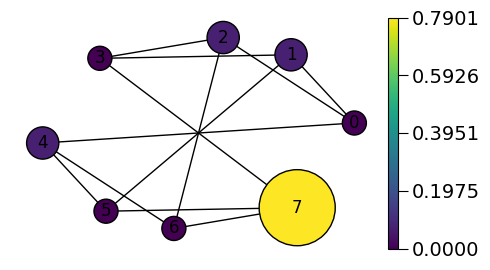

In [7]:
# 'simulate' calculates the state after n steps
final_state = qw.simulate(range = (n,n+1), state = ini_state)

probs = qw.probability_distribution(final_state)

hpw.plot_probability_distribution(probs, graph=cube, figsize=(5,3))

#### Histogram of the probability distribution

In [ ]:
# alternative way of ploting the probability distribution
hpw.plot_probability_distribution(probs, plot='histogram', figsize=(5,3))

#### Animation of the quantum walk

In [ ]:
# 'simulate' calculates a list of states from 0 until n
list_of_states = qw.simulate(range = (0,n+1), state = ini_state)

list_of_probs = qw.probability_distribution(list_of_states)

hpw.plot_probability_distribution(list_of_probs, graph=cube, animate=True, figsize=(6,3))